# Introduction
In machine learning, it is important to find the minimum value of a function. The gradient descent method is used for this purpose.

In this assignment, we will consider the gradient of a function using NumPy to aid in understanding the gradient descent method.​ 

In [1]:
# predefines and imports
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Linear Function

In [2]:
def problem1():
    X = np.linspace(-50,50, num = 1001)
    Y = X/2 + 1
    print('X shape: ',X.shape)
    print('Y shape', Y.shape)
    return X,Y
x,y = problem1()



X shape:  (1001,)
Y shape (1001,)


# Problem 2
## Array combination

In [3]:
def problem2():
    data = np.vstack((x,y)).T
    # data = np.column_stack((x,y)) # this is second option
    print('Data shape: ', data.shape)
    return data
data = problem2()


Data shape:  (1001, 2)


### NOTE: problem 2
Another way to do this kind of stacking columns of one dimension is to use np.column stack

# Problem 3
## Find Gradient

In [4]:
def problem3():
    gradient = change(data[:,1]) / change(data[:,0])
    print(f'gradient shape: {gradient.shape}')
    return gradient

def change(X):
    return X[1:] - X[:-1]
gradient = problem3()

gradient shape: (1000,)


# Problem 4
## Graph

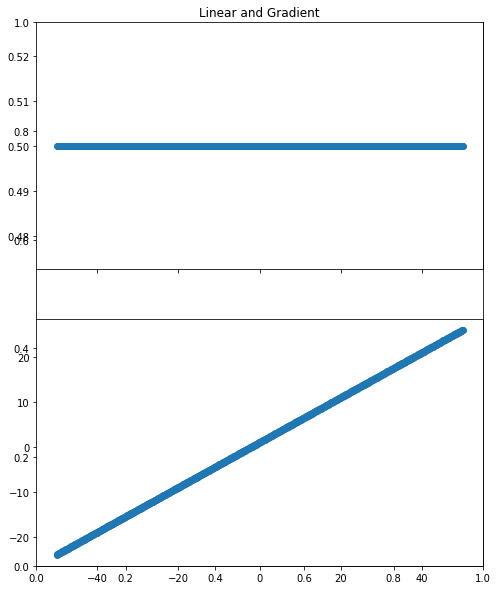

In [5]:
def problem4(): 
    figure = plt.figure(figsize = [8,10])
    plt.title('Linear and Gradient')
    axis = figure.subplots(2,1,sharex=True)
    line = axis[1].scatter(data[:,0], data[:,1])
    grad = axis[0].scatter(data[1:,0], gradient)
    plt.show()
problem4()


# Problem 5
## Functionalization

In [6]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    X = np.arange(*x_range)
    Y = function(X)
    gradient = change(Y)/change(X)
    return np.column_stack((X,Y)), gradient

def function1(array_x):
    return array_x**2
def function2(array_x):
    return 2*array_x**2 + 2**x
def function3(array_x):
    return np.sin(np.sqrt(array_x))
def test_n_graph(function, x_range=(-50, 50.1, 0.1)):
    array_xy, gradient = compute_gradient(function, x_range = x_range)
    figure = plt.figure(figsize = [8,10])
    axis = figure.subplots(2,1,sharex=True)
    axis[0].set_title(f'{function.__name__}')
    line = axis[0].scatter(array_xy[:,0], array_xy[:,1])
    axis[1].set_title('gradient')
    grad = axis[1].scatter(array_xy[1:,0], gradient)
    plt.show()


# def problem5():
#     test_n_graph(function1)
#     test_n_graph(function2)
#     test_n_graph(function3,x_range = (0,50.1,0.1))
# problem5()

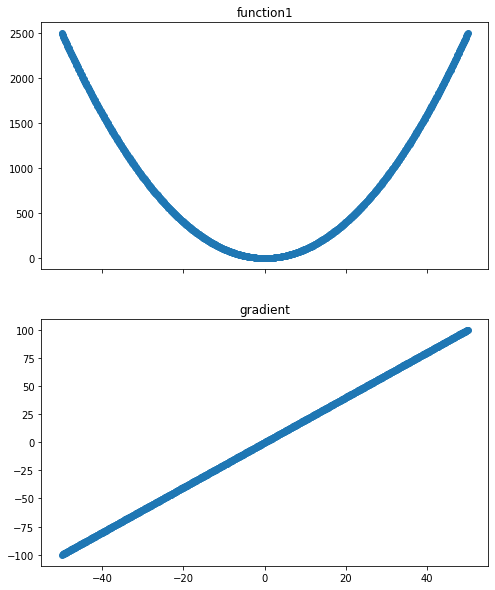

In [7]:
test_n_graph(function1)

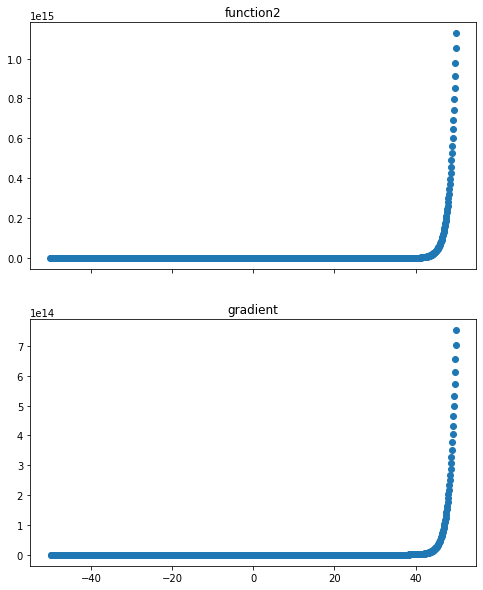

In [8]:
test_n_graph(function2)

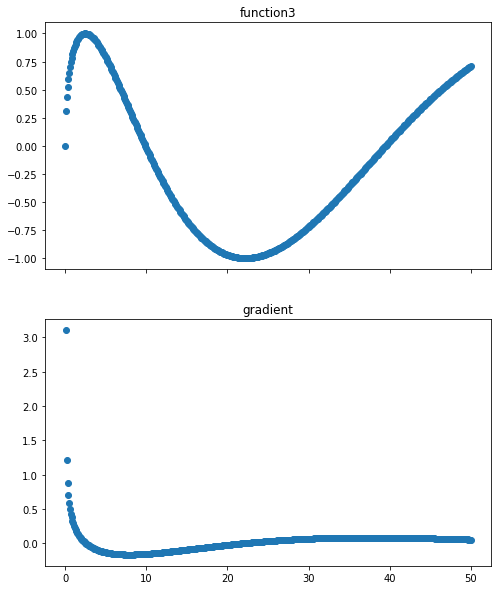

In [9]:
test_n_graph(function3,x_range = (0,50.1,0.1))

# Problem 6
## Min

In [10]:
def min_calculate(function, range_x = (-50,50.1,0.1)):
    X = np.arange(*range_x)
    Y = function(X)
    min_y = np.min(Y)
    arg_min = np.argmin(Y, axis = 0)
    array_xy = np.column_stack((X,Y))
    return array_xy, min_y, arg_min
def test(function, range_x = (-50,50.1,0.1)):
    array_xy, min_y , arg_min = min_calculate(function,range_x)
    print(f'Min caculation of {function.__name__} on range {range_x}')
    print(f'Min y: {min_y}, Arg_min: X[{arg_min}]= {array_xy[arg_min, 0]}')

    slope_before = change(array_xy[arg_min-1:arg_min+1,1]) / change(array_xy[arg_min-1:arg_min+1,0])
    slope_after = change(array_xy[arg_min:arg_min+2,1]) / change(array_xy[arg_min:arg_min+2,0])
    print(f'Slope before: {slope_before} -- Slope After: {slope_after}')

In [11]:
test(function1)

Min caculation of function1 on range (-50, 50.1, 0.1)
Min y: 5.048709793414476e-25, Arg_min: X[500]= 7.105427357601002e-13
Slope before: [-0.1] -- Slope After: [0.1]


In [12]:
test(function2)

Min caculation of function2 on range (-50, 50.1, 0.1)
Min y: 0.9505505632955605, Arg_min: X[498]= -0.1999999999992923
Slope before: [-0.41701833] -- Slope After: [0.02482428]


In [13]:
test(function3, range_x = (0,50.1,0.1))

Min caculation of function3 on range (0, 50.1, 0.1)
Min y: -0.9999997540298113, Arg_min: X[222]= 22.200000000000003
Slope before: [-0.00063884] -- Slope After: [0.00048745]


### NOTE: problem 6
- For some reason the result for problem6 function1 is not 0 but instead very small aproximation.
- **I'd love to know why**, if you know of course.